In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from tensorflow.keras import models
from keras.models import Sequential
from tensorflow.keras import layers

In [7]:
df = pd.read_csv("/content/trainset.csv")

df.columns

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [8]:
train_set = df.iloc[:,1:2].values

type(train_set)

train_set.shape

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

training_set_scaled.shape

(1259, 1)

In [9]:
X_train_array = []
y_train_array = []


In [10]:
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

X_train.shape

length = 60
n_features = 1

In [13]:
model = Sequential()
model.add(layers.SimpleRNN(50,input_shape=(60,1)))

model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse',metrics ='accuracy')

model.summary()

model.fit(X_train1,y_train,epochs=100, batch_size=32)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 2s 13ms/step - loss: 0.0205 - accuracy: 8.3403e-04
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 7.9507e-04 - accuracy: 8.3403e-04
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 6.9162e-04 - accuracy: 8.3403e-04
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 5.8036e-04 - accuracy: 8.3403e-04
Epoch 5/100
38/38 [=

In [17]:
import sklearn.metrics as metrics

     

dataset_test = pd.read_csv("testset.csv")

test_set = dataset_test.iloc[:,1:2].values

test_set.shape

dataset_total = pd.concat((df['Open'],dataset_test['Open']),axis=0)

42/42 [==============================] - 0s 5ms/step


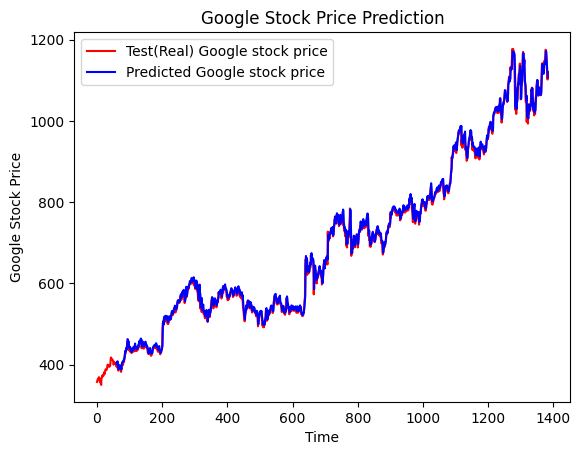

In [19]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

X_test.shape

predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()